In [1]:
pip install pandas matplotlib scikit-learn

C:\Users\khush\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\khush\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\khush\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\khush\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Window

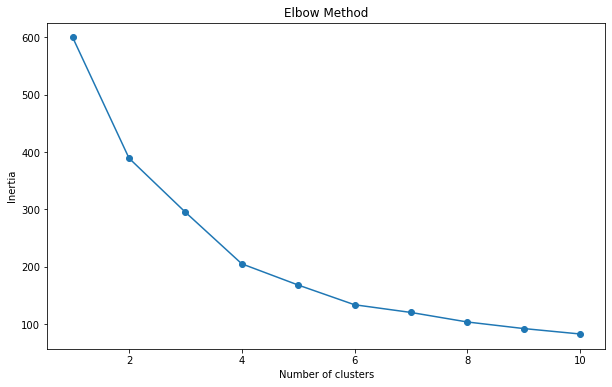

C:\Users\khush\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


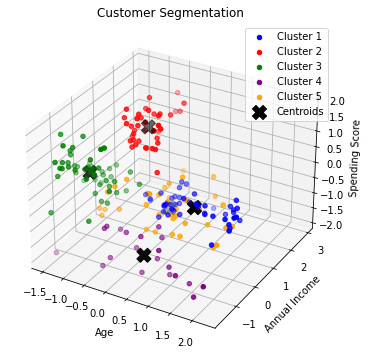

Cluster Centers:
         Age  Annual Income (k$)  Spending Score (1-100)
0  55.638298           54.382979               48.851064
1  32.875000           86.100000               81.525000
2  25.185185           41.092593               62.240741
3  46.250000           26.750000               18.350000
4  39.871795           86.102564               19.358974


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('Mall_Customers.csv')

# Select the relevant features for clustering (Age, Annual Income, and Spending Score)
X = data.iloc[:, [2, 3, 4]].values

# Feature scaling (important for clustering algorithms)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Finding the optimal number of clusters using the Elbow Method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Based on the Elbow Method, we'll choose the number of clusters as 5
num_clusters = 5

# Applying K-means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Adding the cluster labels to the original dataset
data['Cluster'] = y_kmeans

# Visualizing the clusters in a 3D plot (you can modify this based on the features selected)
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1], X_scaled[y_kmeans == 0, 2], c='blue', label='Cluster 1')
ax.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 1], X_scaled[y_kmeans == 1, 2], c='red', label='Cluster 2')
ax.scatter(X_scaled[y_kmeans == 2, 0], X_scaled[y_kmeans == 2, 1], X_scaled[y_kmeans == 2, 2], c='green', label='Cluster 3')
ax.scatter(X_scaled[y_kmeans == 3, 0], X_scaled[y_kmeans == 3, 1], X_scaled[y_kmeans == 3, 2], c='purple', label='Cluster 4')
ax.scatter(X_scaled[y_kmeans == 4, 0], X_scaled[y_kmeans == 4, 1], X_scaled[y_kmeans == 4, 2], c='orange', label='Cluster 5')
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=200, c='black', marker='X', label='Centroids')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
plt.title('Customer Segmentation')
plt.legend()
plt.show()

# Printing the cluster centers (representative of each segment)
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
print("Cluster Centers:")
print(pd.DataFrame(cluster_centers, columns=["Age", "Annual Income (k$)", "Spending Score (1-100)"]))
